In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.optimize import minimize

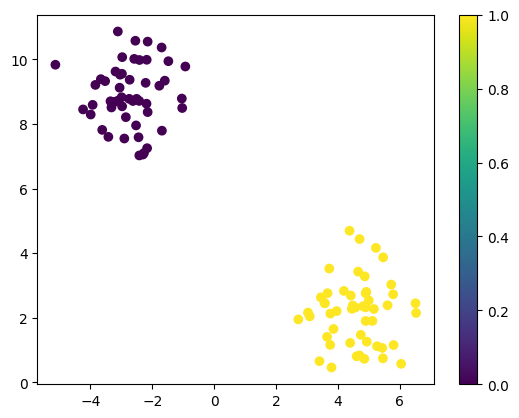

In [2]:
# Create dataset
x,y = make_blobs(centers=2, random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar()

In [3]:
class LinearRegression:

    def __init__(self, alpha) -> None:
        self.w = None
        self.alpha = alpha

    def _prepare_input(self, x):
        return np.concatenate((x, np.ones(len(x)).reshape(-1,1)), axis=1)
    
    @property
    def coef_(self):
        return self.w[:-1]
    
    @property
    def intercept_(self):
        return self.w[-1]
    
    def fit(self, x, y):
        x = self._prepare_input(x)
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x) + self.alpha*np.eye(x.shape[1])), x.T), y)

    def predict(self, x):
        x = self._prepare_input(x)
        return np.dot(x, self.w)

def sgm(x):
    return 1/(1+np.exp(-x))

class LogReg:

    def __init__(self, alpha) -> None:
        self.w = None
        self.alpha = alpha

    def _prepare_input(self, x):
        return np.concatenate((x, np.ones(len(x)).reshape(-1,1)), axis=1)
    
    @property
    def coef_(self):
        return self.w[:-1]
    
    @property
    def intercept_(self):
        return self.w[-1]

    def fit(self, x, y):
        x = self._prepare_input(x)
        def loss(w):
            z = np.dot(x, w)
            w_ = w[:-1]
            return -np.sum(y*z - np.log(1+np.exp(z))) + self.alpha*np.dot(w_, w_)
        def grad(w):
            z = np.dot(x, w)
            w_ = np.array(w[:-1].tolist() + [0])
            return -np.dot(x.T, y - sgm(z)) + 2*self.alpha*w_

        self.w = minimize(loss, np.zeros(x.shape[1]), jac=grad, method="L-BFGS-B", tol=1e-12).x

    def predict(self, x):
        return self.score(x) > 0.5
    
    def score(self, x):
        x = self._prepare_input(x)
        return sgm(np.dot(x, self.w))

[ 0.9779557  -0.82848154] 3.657561820864512


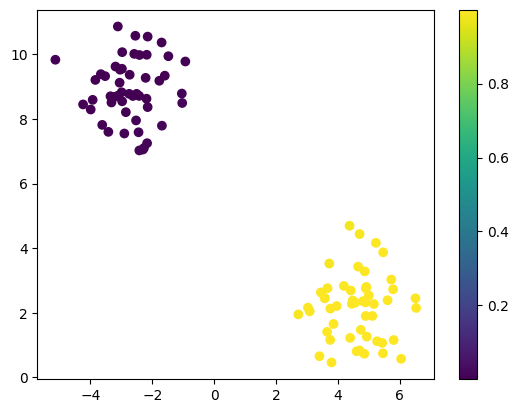

In [4]:
model = LogReg(0.5)
model.fit(x, y)

print(model.coef_, model.intercept_)

col = model.score(x)
plt.scatter(x[:, 0], x[:, 1], c=col)
plt.colorbar()

[ 0.0802748  -0.05680931] 0.7376771384235444


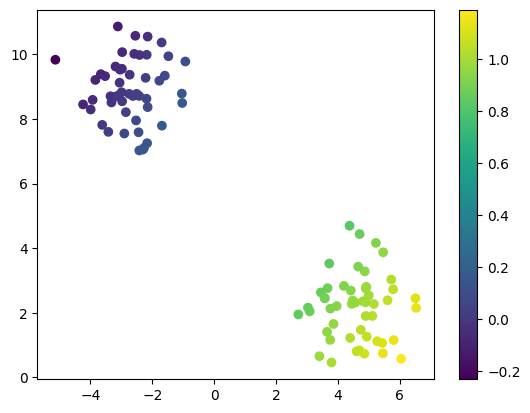

In [5]:
model = LinearRegression(0)
model.fit(x, y)

print(model.coef_, model.intercept_)

col = model.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=col)
plt.colorbar()

# Real world dataset 1

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/TrainArousal.csv", sep=";")

In [7]:
x = df.drop(columns=["mean_arousal", "song_id"]).values
y = df.mean_arousal.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.metrics import r2_score

model = LinearRegression(0)
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(r2_score(y_test, pred))

0.5221889419850267


In [9]:
from sklearn.linear_model import LinearRegression as skLinearRegression

model2 = skLinearRegression()
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
print(r2_score(y_test, pred))

0.5221889419847725


# Real world dataset 1

In [10]:
df = pd.read_csv("./data/TrainValence.csv", sep=";")

In [11]:
x = df.drop(columns=["mean_valence", "song_id"]).values
y = df.mean_valence.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression(0)
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(r2_score(y_test, pred))

0.3596119160415525


In [13]:
model2 = skLinearRegression()
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
print(r2_score(y_test, pred))

0.359611916041056
